In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix
from google.colab import drive
drive.mount('/content/drive/')
data=pd.read_csv("/content/drive/MyDrive/images/Iris.csv")
data=data.set_index('Id')
data.head(50)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000 



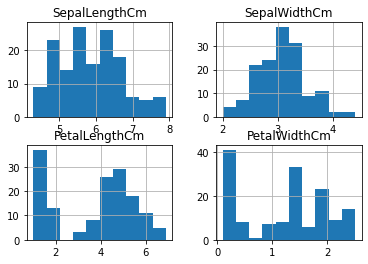

In [ ]:
print(data.describe(),'\n') #ya da data.describe().T
data.hist()
plt.show()

In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

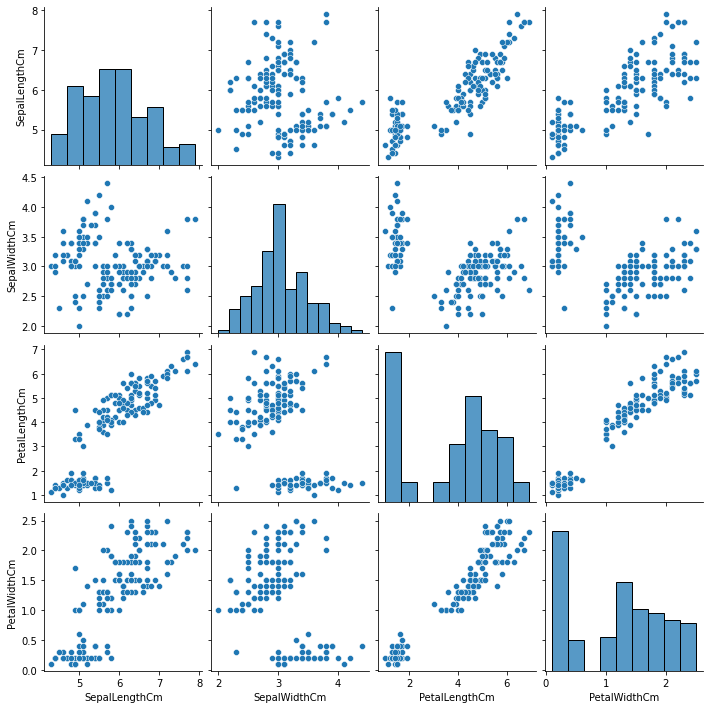

In [ ]:
sns.pairplot(data)

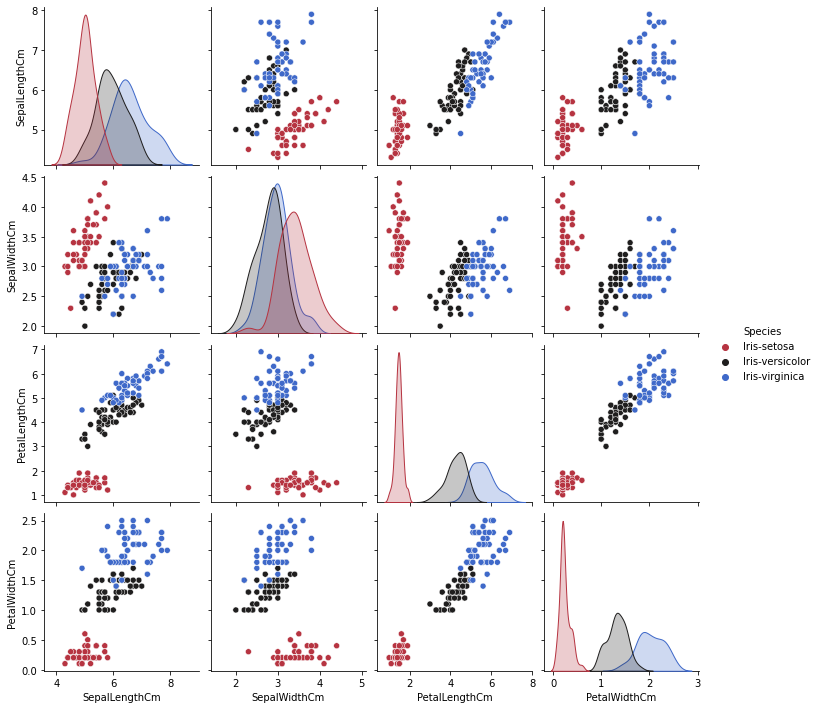

In [ ]:
sns.pairplot(data, hue='Species',palette='icefire_r')

In [ ]:
from sklearn.cluster import KMeans
import sklearn
from sklearn.datasets import load_iris
from sklearn import datasets
iris = datasets.load_iris()
x = data.iloc[:, 0:4].values
kmeans = KMeans(n_clusters=3)
y_kmeans3 = kmeans.fit_predict(x)
KMmodel = kmeans.fit(iris.data)

In [ ]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
for i in range(1, 8):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = i, random_state = 77)
    kmeans.fit(x)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 5, random_state = 77)
y_kmeans = kmeans.fit_predict(x)

k-means++ ile k-means aynı basit mantığa sahiptir.
ağırllık merkezi seçilir, öklid mesafesi hesaplanır en uzak nokta seçilir bir sonraki merkeze atanır. Her nokta en yakın merkezle ilişkilenir.
Merkezler etrafında kümeleme işlemi gerçekleşir.

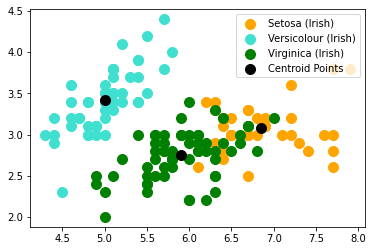

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Setosa (Irish)')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'turquoise', label = 'Versicolour (Irish)')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Virginica (Irish)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid Points')
plt.legend()

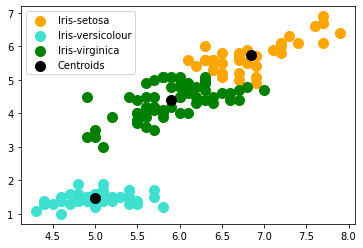

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], s = 100, c = 'turquoise', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'black', label = 'Centroids')
plt.legend()

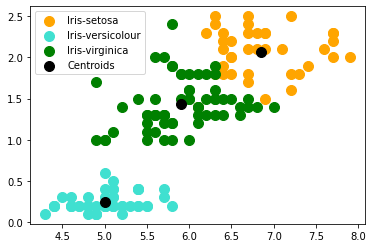

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 3], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 3], s = 100, c = 'turquoise', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], s = 100, c = 'black', label = 'Centroids')
plt.legend()

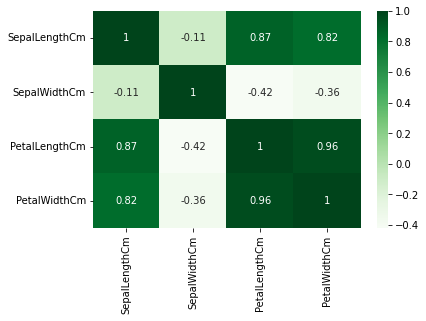

In [ ]:
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap="Greens")

Fit(data) yöntemi, ölçeklendirme için daha fazla kullanılabilmek üzere belirli bir özelliğin ortalamasını ve standart sapmasını hesaplamak için kullanılır. Transform(data) yöntemi kullanılarak hesaplanan ortalama değerler ölçeklendirme yapmak için kullanılır.

In [ ]:
'''encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])
data.head(50)'''

"encoder = LabelEncoder()\ndata['Species'] = encoder.fit_transform(data['Species'])\ndata.head(50)"

In [ ]:
x = data.drop('Species',axis=1)
y = data['Species']
tr_x, test_x, tr_y, test_y = train_test_split(x,y,test_size=0.2)

print("Train x shape: ",tr_x.shape)
print("Test x shape: ",test_x.shape)
print("Train y shape: ",tr_y.shape)
print("Test y shape: ",test_y.shape)

Train x shape:  (120, 4)
Test x shape:  (30, 4)
Train y shape:  (120,)
Test y shape:  (30,)


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


"liblinear", "newton-cg", "sag", "lbfgs" hakkında detaylı bilgilere erişmek için tıklayın.

			 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.83      0.83         6
           2       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30
 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


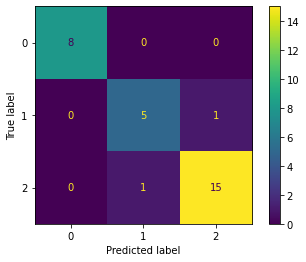

In [ ]:
lr  = LogisticRegression(solver='liblinear').fit(tr_x, tr_y)
est_y_lr = lr.predict(test_x)
class_rep_LR = classification_report(test_y, est_y_lr)
print('\t\t\t Classification report:\n', class_rep_LR, '\n')
plot_confusion_matrix(lr, test_x, test_y)
plt.show()